In [1]:
import os
from Bio import SeqIO
import numpy as np
import pandas as pd
os.chdir("/home/t326h379/Prot_T5/After_CD_HIT_deepUBI_protein")
# Independent Testing
indep_test_x_81 = []
indep_test_y_81 = []
posit_1 = 1;
negat_0 = 0;

aminoacids='ARNDCQEGHILKMFPSTWYV-'

def binary_encode(Sequence_one_hot_encoding): 
    aa2v={x:y for x,y in zip(aminoacids,np.eye(21,21).tolist())}
    aa2v['X']=np.zeros(21)
    encoding=[]
    for i in range(len(Sequence_one_hot_encoding)):
        s=Sequence_one_hot_encoding[i]
        encoding.append([aa2v[x] for x in s])
    encoding=np.array(encoding)
    return encoding

aaindex=pd.read_table('aaindex31.txt',sep='\s+',header=None)
aaindex=aaindex.subtract(aaindex.min(axis=1),axis=0).divide((aaindex.max(axis=1)-aaindex.min(axis=1)),axis=0)
aa=[x for x in 'ARNDCQEGHILKMFPSTWYV']
aaindex=aaindex.to_numpy().T
index={x:y for x,y in zip(aa,aaindex.tolist())}
index['-']=np.zeros(31).tolist()
index['X']=np.zeros(31).tolist()

def index_encode(Sequence_one_hot_encoding):
    encoding=[]
    for i in range(len(Sequence_one_hot_encoding)):
        s=Sequence_one_hot_encoding[i]
        encoding.append([index[x] for x in (s)])
    encoding=np.array(encoding)
    return encoding

alphabet = 'ARNDCQEGHILKMFPSTWYV-'


char_to_int = dict((c, i) for i, c in enumerate(alphabet))
int_to_char = dict((i, c) for i, c in enumerate(alphabet))

def inner1():
    #Input
    data = seq_record.seq

    for char in data:
        if char not in alphabet:
            return
    integer_encoded = [char_to_int[char] for char in data]
    indep_test_x_81.append(integer_encoded)
    indep_test_y_81.append(posit_1)
for seq_record in SeqIO.parse("Positive_10_percent_independent_test_set_DeepUBI.fasta", "fasta"):
    inner1()

def inner2():
    #Input
    data = seq_record.seq

    for char in data:
        if char not in alphabet:
            return
    integer_encoded = [char_to_int[char] for char in data]
    indep_test_x_81.append(integer_encoded)
    indep_test_y_81.append(negat_0)
for seq_record in SeqIO.parse("Negative_10_percent_independent_test_set_DeepUBI.fasta", "fasta"):
    inner2()

# Changing to array (matrix)    
indep_test_x_81 = np.array(indep_test_x_81)
indep_test_y_81 = np.array(indep_test_y_81)

print(indep_test_x_81.shape,indep_test_y_81.shape)

AAindex_Test_AAAAA_81_Sequence = []
for i in range(len(indep_test_x_81)):
    integer_of_string = str(indep_test_x_81[i])
    integer_of_string = integer_of_string.strip("[").strip("]").strip(" ")
    keras_job = integer_of_string.split()
    individual_AA_peptide = []
    for i in range(len(keras_job)):
        index_value = int(keras_job[i])
        individual_AA_peptide.append(int_to_char.get(index_value))
    individual_AA_peptide = "".join(individual_AA_peptide)
    AAindex_Test_AAAAA_81_Sequence.append(individual_AA_peptide) 

yval = indep_test_y_81

x_ind_49 = indep_test_x_81[:,[i for i in range(16,65)]]

AAindex_indi_AA_Sequence = []
for i in range(len(x_ind_49)):
    integer_of_string = str(x_ind_49[i])
    integer_of_string = integer_of_string.strip("[").strip("]").strip(" ")
    keras_job = integer_of_string.split()
    individual_AA_peptide = []
    for i in range(len(keras_job)):
        index_value = int(keras_job[i])
        individual_AA_peptide.append(int_to_char.get(index_value))
    individual_AA_peptide = "".join(individual_AA_peptide)
    AAindex_indi_AA_Sequence.append(individual_AA_peptide) 

binaryCoding_Independent_Test = binary_encode(AAindex_indi_AA_Sequence)

AAindexCoding_Independent_Test = index_encode(AAindex_indi_AA_Sequence)

(12598, 81) (12598,)


In [2]:
binaryCoding_Independent_Test.shape

(12598, 49, 21)

In [3]:
AAindexCoding_Independent_Test.shape

(12598, 49, 31)

In [4]:
x_ind_49.shape

(12598, 49)

# Load the model

In [5]:
from tensorflow import keras
model = keras.models.load_model("DeepUBI_AAindex_One_Hot_Emb_drop_out2423.h5")

Y_pred = model.predict([AAindexCoding_Independent_Test,binaryCoding_Independent_Test,x_ind_49])

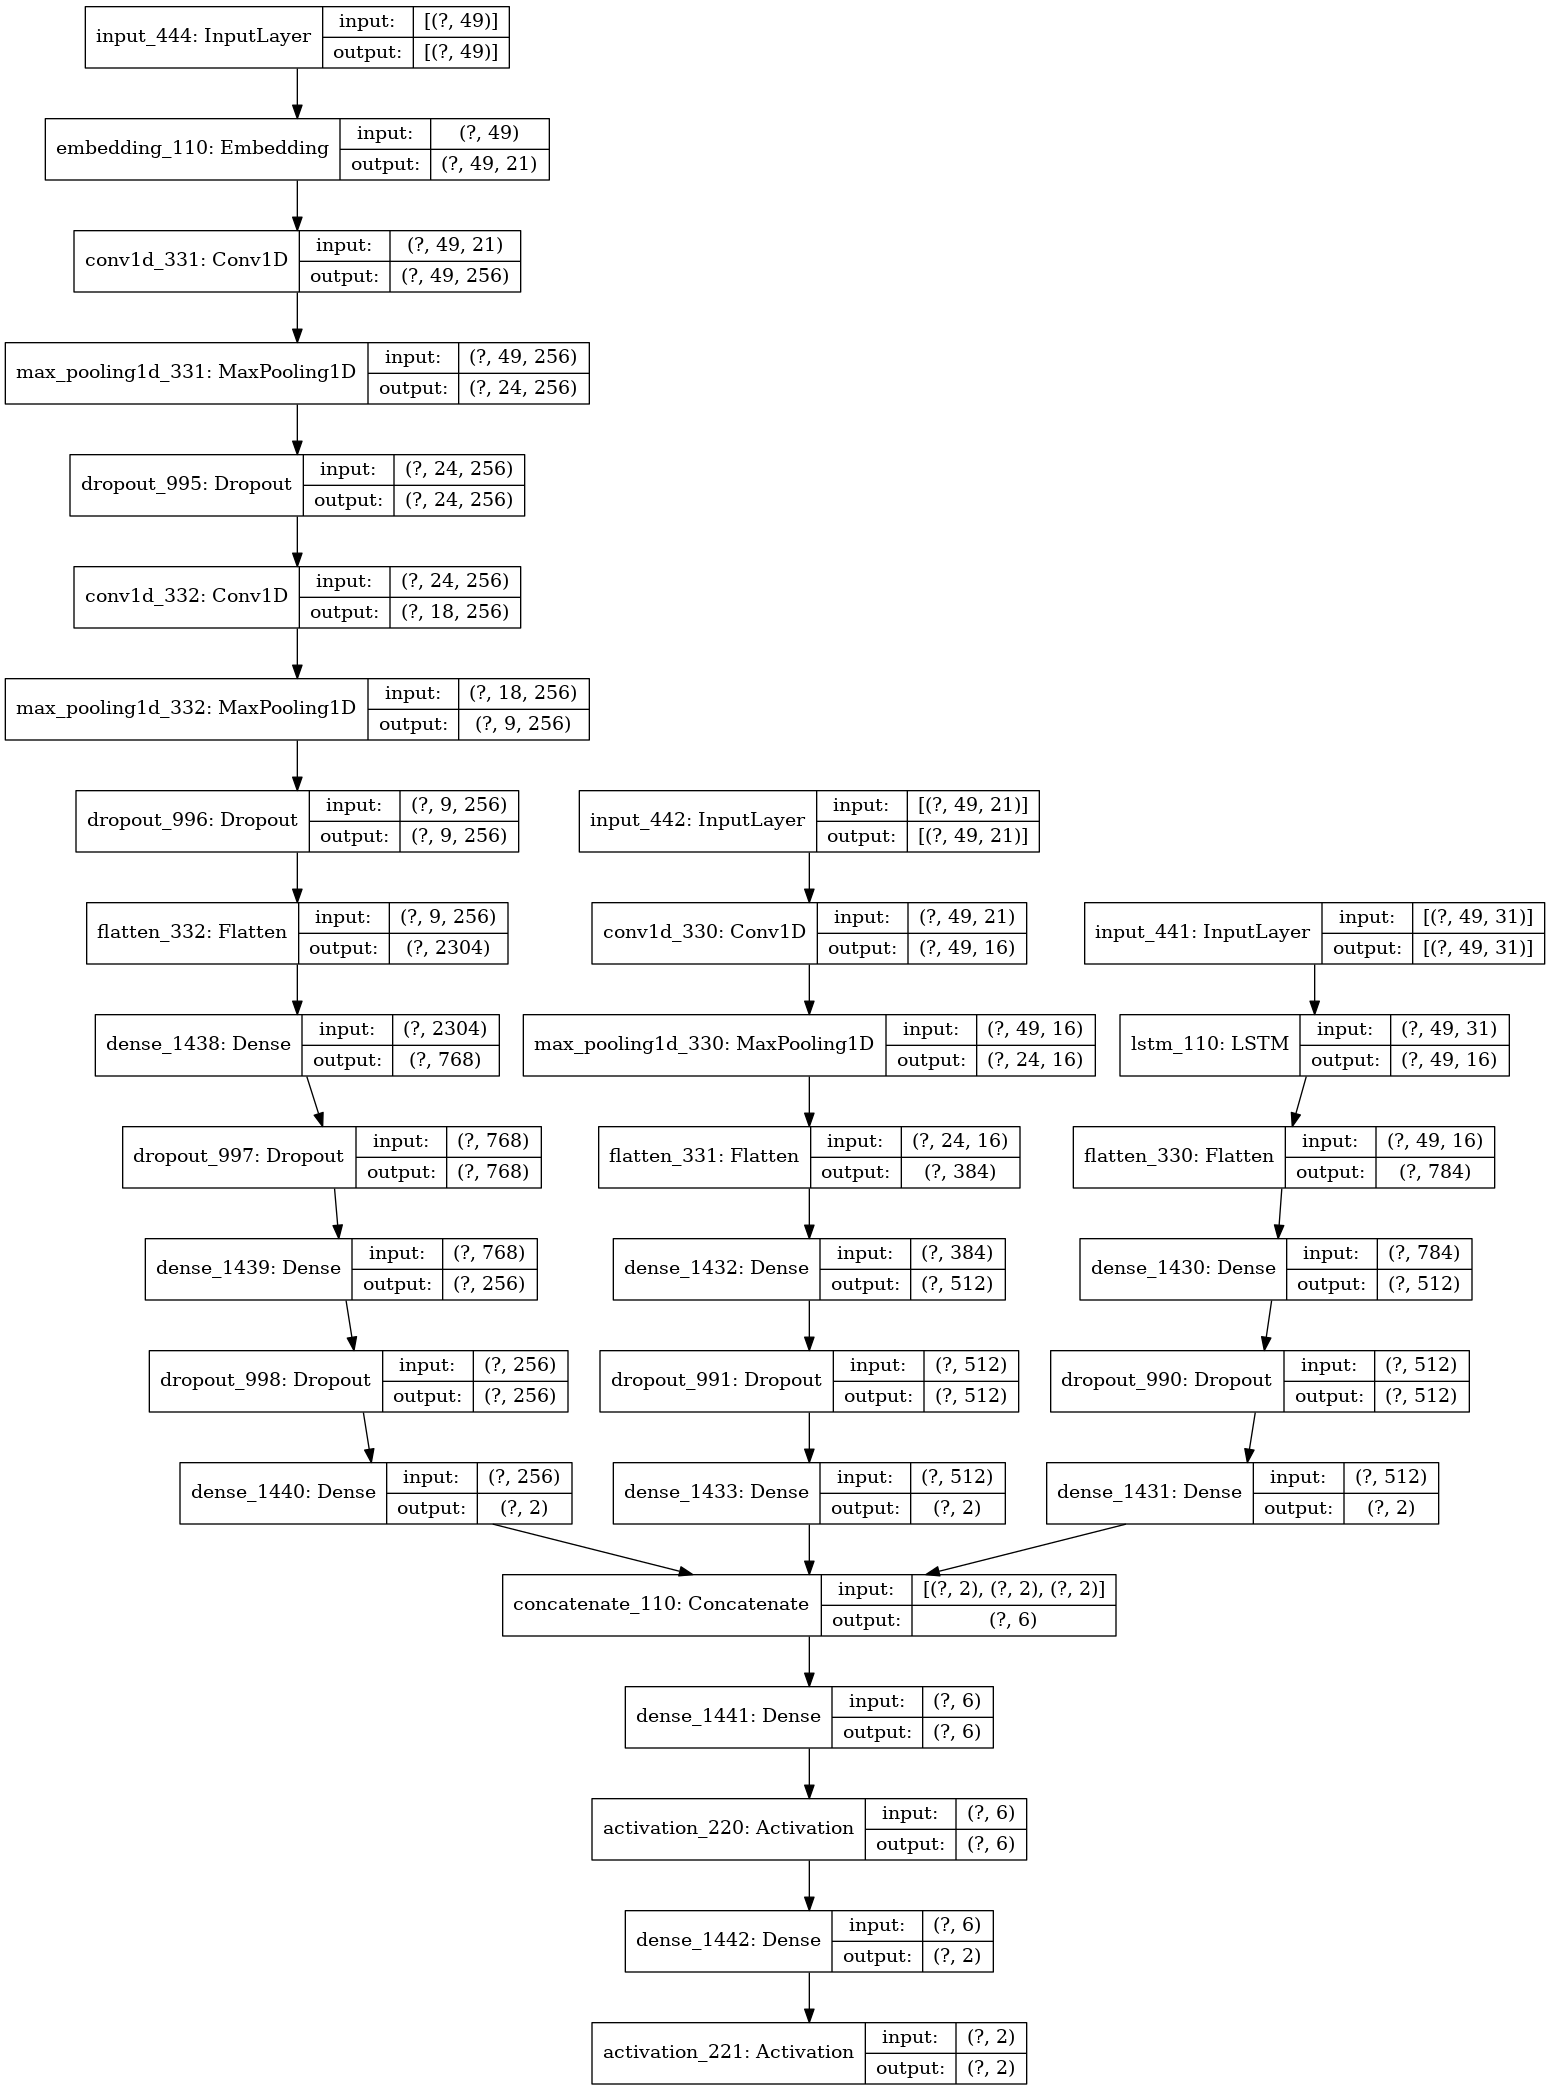

In [6]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes = True, to_file='Large_Ubiquitination.png')

In [7]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix
Y_pred = model.predict([AAindexCoding_Independent_Test,binaryCoding_Independent_Test,x_ind_49])

t_pred2 = Y_pred[:,1]

Y_pred = (Y_pred > 0.5)
y_pred1 = [np.argmax(y, axis=None, out=None) for y in Y_pred]
y_pred1 = np.array(y_pred1)


mcc_test = matthews_corrcoef(yval, y_pred1)
# For sensitivity and specificity
sp_1, sn_1 = confusion_matrix(yval, y_pred1)
sp_2_test = sp_1[0]/(sp_1[0]+sp_1[1])
sn_2_test = sn_1[1]/(sn_1[0]+sn_1[1])
# ROC


print("Specificity = ",sp_2_test, " Sensitivity = ",sn_2_test)
print(model.summary())
print("testx",yval.shape)

y_pred = y_pred1



Specificity =  0.8067729083665338  Sensitivity =  0.7498020585906572
Model: "functional_221"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_444 (InputLayer)          [(None, 49)]         0                                            
__________________________________________________________________________________________________
embedding_110 (Embedding)       (None, 49, 21)       483         input_444[0][0]                  
__________________________________________________________________________________________________
conv1d_331 (Conv1D)             (None, 49, 256)      5632        embedding_110[0][0]              
__________________________________________________________________________________________________
max_pooling1d_331 (MaxPooling1D (None, 24, 256)      0           conv1d_331[0][0]                 
________________

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score,matthews_corrcoef
Accuracyyyyy = accuracy_score(yval, y_pred)
cm = confusion_matrix(yval, y_pred)
mcc = matthews_corrcoef(yval, y_pred)

print("Matthews Correlation : ",mcc)
print("\n")
print("Confusion Matrix : \n",cm)
print("\n")
print("Accuracy on test set:   ",Accuracyyyyy)
print("\n")

TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]

Sensitivity = TP/(TP+FN)

Specificity = TN/(TN+FP)


print("Sensitivity:   ",Sensitivity,"\t","Specificity:   ",Specificity)

print(classification_report(yval, y_pred))

Matthews Correlation :  0.5458386140298045


Confusion Matrix : 
 [[4050  970]
 [1896 5682]]


Accuracy on test set:    0.7725035719955549


Sensitivity:    0.7498020585906572 	 Specificity:    0.8067729083665338
              precision    recall  f1-score   support

           0       0.68      0.81      0.74      5020
           1       0.85      0.75      0.80      7578

    accuracy                           0.77     12598
   macro avg       0.77      0.78      0.77     12598
weighted avg       0.79      0.77      0.77     12598



# Thank You